### Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#imports
import scipy.io
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import obspy
import pywt
import pywt.data

### Load the trimmed data 

In [3]:
path = "/Users/ecem/Desktop/phonocardiogram/data/TV/present"
path_w = "/Users/ecem/Desktop/phonocardiogram/data/wavelet_4"
waves = np.load(path + "/present_TV_waves_10sec.npy", allow_pickle= True)

In [4]:
waves.shape

(1205, 40000)

## Let's look at wavelet decomposition for a signal piece

#### how our decomposition filter values look like

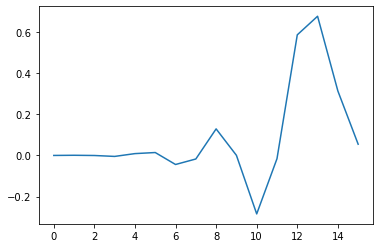

In [7]:
w = pywt.Wavelet('db8')
plt.plot(w.dec_lo)
coeffs = pywt.wavedec(waves[0], w, level=6)

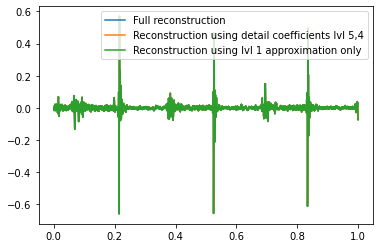

In [8]:
def reconstruction_plot(yyy, **kwargs):
    """Plot signal vector on x [0,1] independently of amount of values it contains."""
    plt.plot(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(pywt.waverec(coeffs, w)) # full reconstruction 
reconstruction_plot(pywt.waverec(coeffs[:-1] + [None] * 1, w)) # leaving out detail coefficients up to lvl 5
reconstruction_plot(pywt.waverec(coeffs[:-2] + [None] * 2, w)) # leaving out detail coefficients up to lvl 4
#reconstruction_plot(pywt.waverec(coeffs[:-3] + [None] * 3, w)) # leaving out detail coefficients up to lvl 3
#reconstruction_plot(pywt.waverec(coeffs[:-4] + [None] * 4, w)) # leaving out detail coefficients up to lvl 2
#reconstruction_plot(pywt.waverec(coeffs[:-5] + [None] * 5, w)) # leaving out detail coefficients up to lvl 1
#reconstruction_plot(pywt.waverec(coeffs[:-6] + [None] * 6, w)) # leaving out all detail coefficients = reconstruction using lvl1 approximation only
plt.legend(['Full reconstruction', 'Reconstruction using detail coefficients lvl 5,4', 'Reconstruction using lvl 1 approximation only'])

Amplitude of the coefficient corresponds to amplitude with which the wavelet occurs in the signal (y axis), and position of the coefficient corresponds to the time (x axis). 

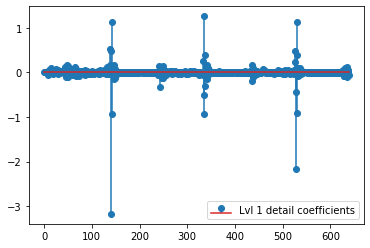

In [9]:
plt.stem(coeffs[1]); plt.legend(['Lvl 1 detail coefficients'])

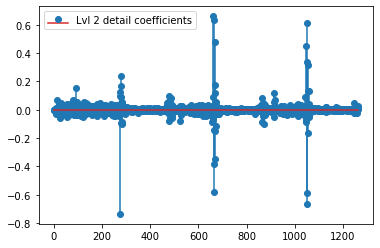

In [10]:
plt.stem(coeffs[2]); plt.legend(['Lvl 2 detail coefficients'])


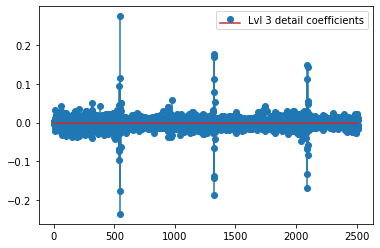

In [11]:
plt.stem(coeffs[3]); plt.legend(['Lvl 3 detail coefficients'])


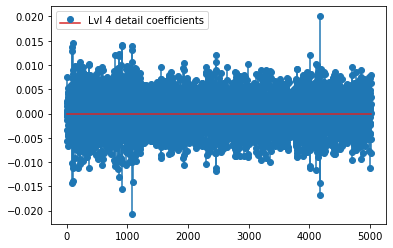

In [12]:
plt.stem(coeffs[4]); plt.legend(['Lvl 4 detail coefficients'])


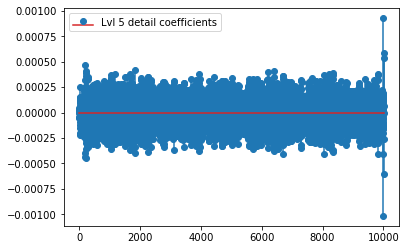

In [13]:
plt.stem(coeffs[5]); plt.legend(['Lvl 5 detail coefficients'])


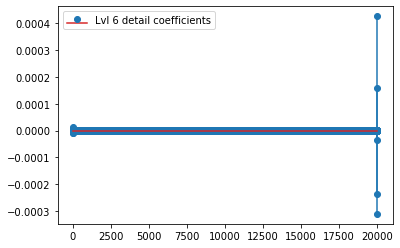

In [14]:
plt.stem(coeffs[6]); plt.legend(['Lvl 6 detail coefficients'])

In [15]:
# Reconstruction of signal using just lvl1 approximation
approx_lvl1 = pywt.waverec(coeffs[:-6] + [None] * 6, w)
# interpolate to original amount of samples (necessary due to numeric solution of transformation not yielding same amount of values)
approx_lvl1_interp = np.interp(x=np.arange(0, len(waves[0])), xp=np.linspace(0, 525, len(approx_lvl1)), fp=approx_lvl1)
x_without_lvl1approx = waves[0] - approx_lvl1_interp

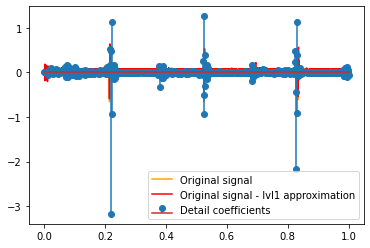

In [16]:
def reconstruction_stem(yyy, **kwargs):
    """Plot coefficient vector on x [0,1] independently of amount of values it contains."""
    plt.stem(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(waves[0], color='orange')
reconstruction_plot(x_without_lvl1approx, color='red')
reconstruction_stem(coeffs[1])
plt.legend(['Original signal', 'Original signal - lvl1 approximation', 'Detail coefficients'])

In [17]:
import pandas as pd

In [18]:
coef = []
for i in range(len(waves)):
    coef.append(pywt.wavedec(waves[i], w, level=5))

In [19]:
for i in range(6):
    print(coef[0][i].shape)

(1264,)
(1264,)
(2514,)
(5013,)
(10011,)
(20007,)


In [20]:
coef[0]

[array([-0.04171453, -0.04171477, -0.04121951, ..., -0.19013362,
        -0.38719362, -0.42799455], dtype=float32),
 array([-0.00025548, -0.00025539, -0.00134455, ...,  0.00440556,
         0.0073363 ,  0.02764374], dtype=float32),
 array([ 0.00250934, -0.00415139,  0.00260509, ...,  0.0101872 ,
        -0.01172041,  0.00681464], dtype=float32),
 array([-4.2450833e-04,  2.9733544e-04,  1.0778689e-05, ...,
        -5.2753291e-03,  1.9198098e-03,  1.1701879e-05], dtype=float32),
 array([ 1.1182385e-05,  2.6747693e-05, -4.8480968e-05, ...,
        -6.0773618e-07, -2.6047928e-04,  6.6977380e-05], dtype=float32),
 array([-7.3657134e-06,  1.2179624e-05, -8.0788386e-06, ...,
        -3.6689777e-05,  9.4316692e-07,  2.0869375e-06], dtype=float32)]

In [21]:
coef[1]

[array([-0.40498525, -0.40388188, -0.4010853 , ...,  0.0677617 ,
         0.0775615 ,  0.07267851], dtype=float32),
 array([-0.00123597, -0.00124484, -0.00672637, ...,  0.00563841,
         0.03106407, -0.0127091 ], dtype=float32),
 array([ 0.01222456, -0.02111991,  0.01139885, ...,  0.00187938,
         0.00911532, -0.00553278], dtype=float32),
 array([ 0.00155313, -0.00513599,  0.00281832, ...,  0.00081187,
        -0.00175466,  0.00491945], dtype=float32),
 array([-5.3742551e-04,  2.4231996e-04,  4.0778516e-05, ...,
        -8.8190091e-06,  1.2618152e-04, -1.2310283e-04], dtype=float32),
 array([ 2.3901678e-04, -4.2787640e-04,  3.0823643e-04, ...,
        -1.1788350e-06, -8.8683316e-07, -5.8377850e-08], dtype=float32)]

### Level by level

In [22]:
def level_coef_extractor_3d(array, lvl = 0):
    array =np.array(array)
    
    lenn = array[0][lvl].shape[0] #48
    coef = np.ones(shape = (array.shape[0],lenn)) #2392,48
    
    for i in range(array.shape[0]):
        coef[i,:] = array[i][lvl]
        
    return coef

In [23]:
def saver(array = 0, lvl = 0, dir_path = None, name = 'blank'):
    coefs = level_coef_extractor_3d(array, lvl)
    np.save(dir_path + "/"+ str(name) + "_lvl_"  + str(lvl), coefs, allow_pickle = True)
    del coefs

In [25]:
for i in range(6):
    saver(coef, i, path_w, 'present_TV_wavelet_coef_5')


In [26]:
waves_ = np.load(path_w+ "/present_TV_wavelet_coef_5_lvl_0.npy",  allow_pickle = True)

In [27]:
waves_.shape

(1205, 1264)

In [28]:
waves_[0]

array([-0.04171453, -0.04171477, -0.04121951, ..., -0.19013362,
       -0.38719362, -0.42799455])

In [29]:
waves_[10]

array([-0.00617968, -0.00400663, -0.0056887 , ...,  0.08899294,
        0.07869443,  0.0557631 ])